# Introduction

This notebook is dedicated to exploring and visualizing data features before apply deep learning for predicting credit risk. The objective is to understand the distribution and relationships of various features within the dataset, which will ultimately aid in the development and improvement of our predictive models.

Accurate prediction of credit risk is crucial for optimizing lending strategies, improving risk management, and enhancing financial decision-making processes. By analyzing historical credit data, we can identify patterns and trends that indicate the likelihood of a credit application being approved or not. The target column in this dataset is "Loan Status," where 0 denotes a not approved application and 1 denotes an approved application. This knowledge enables financial institutions to make informed decisions, such as adjusting lending criteria or targeting specific customer segments to mitigate risk.

In [1]:
#!nvcc -V && which nvcc

In [2]:
#!python --version
#!nvidia-smi

In [3]:
# !pip install cudf-cu12 --extra-index-url=https://pypi.nvidia.com

# Importing Libraries

In [4]:
# importing libraries fundamentals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
from matplotlib import pyplot

import plotly.graph_objects as go
import plotly.express as px
import cufflinks as cf
%matplotlib inline

# Library for Null Values Imputing
import missingno as msno

# importing cudas

# Loading the Dataset

In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv


In [6]:
# load cudas extension

# %load_ext cudf.pandas

# import data from gdrive

df = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')

## Dataset Information

In [7]:
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
df.describe()
# description of dataset

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [9]:
df.describe(include='object').T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [10]:
df.info()

# there by are 32 columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [11]:
df.shape
# Dataset has 119390 rows and 32 columns

(32581, 12)

In [12]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

## Find the Categorical dtype and Numerical dtype

In [13]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')


In [14]:
for col in object_columns:
    d_type = df[col].dtype

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for person_home_ownership:
person_home_ownership
RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: count, dtype: int64
Counts for loan_intent:
loan_intent
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: count, dtype: int64
Counts for loan_grade:
loan_grade
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: count, dtype: int64
Counts for cb_person_default_on_file:
cb_person_default_on_file
N    26836
Y     5745
Name: count, dtype: int64


In [15]:
num_columns = df.select_dtypes(include=['float', 'int64']).columns
print(num_columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')


## Dealt with Null Values



In [16]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [17]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
df[missing_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   person_emp_length  31686 non-null  float64
 1   loan_int_rate      29465 non-null  float64
dtypes: float64(2)
memory usage: 509.2 KB


In [18]:
def fill_numerical(df):
    num_cols = df.select_dtypes(include=['number']).columns
    for col in num_cols:
        df[col] = df[col].fillna(df[col].mean())
    return df

df = fill_numerical(df)

In [19]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
df[missing_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Empty DataFrame


## Dealt with Duplicated Value

In [20]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32581, dtype: bool

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32576    False
32577    False
32578    False
32579    False
32580    False
Length: 32416, dtype: bool

theres no null value again :)

# Exploratory Data Analysis

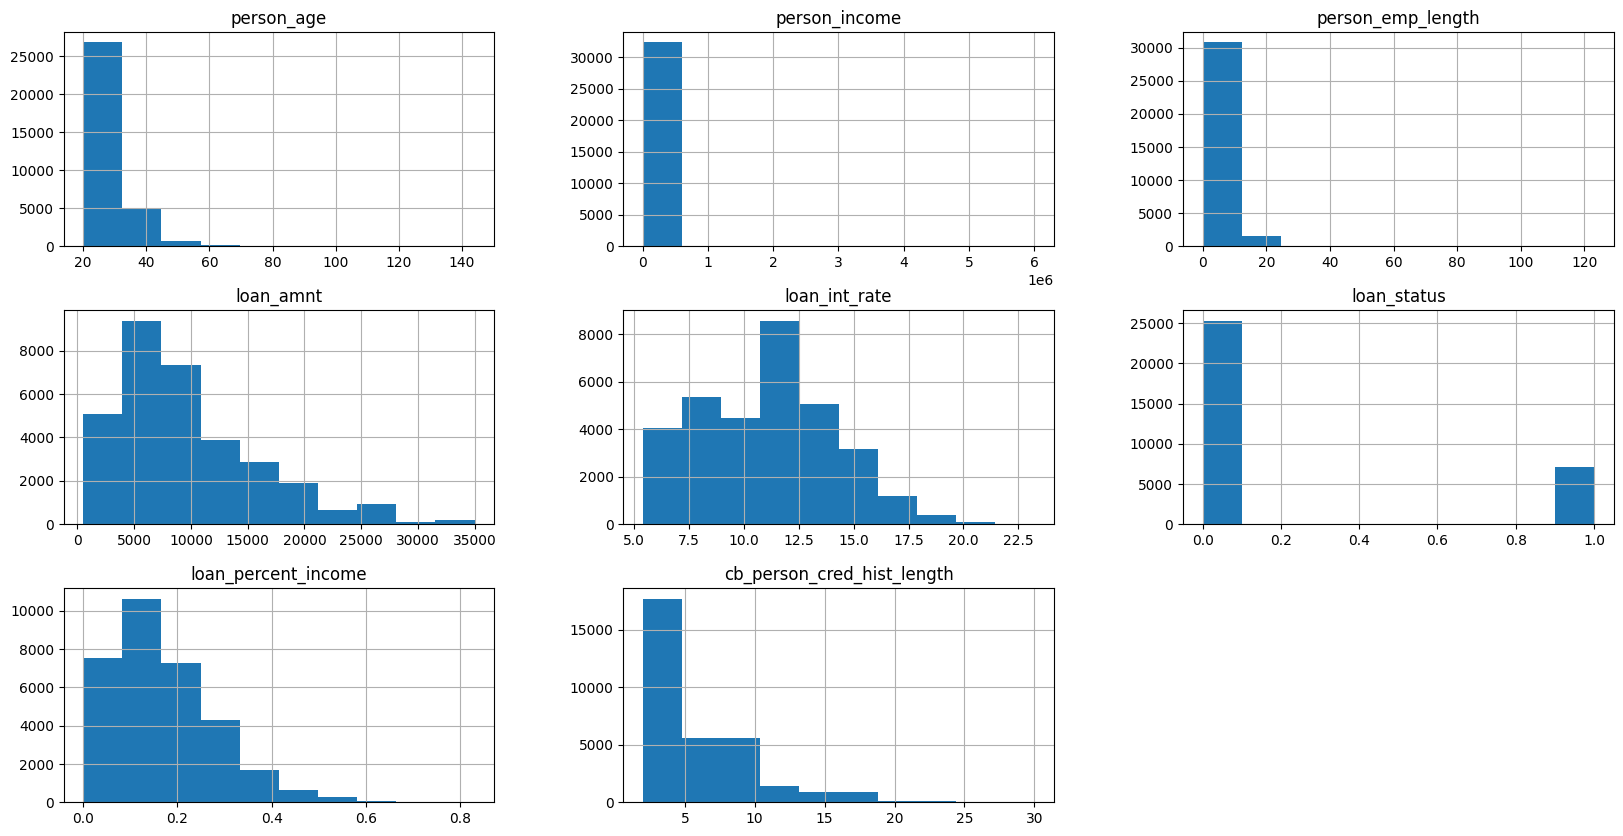

In [23]:
df.hist(figsize=(20, 10))
plt.show()

In [24]:
# Plotting Value Counts of 1 column with Pie Plot

def plot_pie_single(column):
    target_column = df[column].value_counts()
    plt.figure(figsize=(12, 8))
    fig1, ax1 = plt.subplots()
    ax1.pie(target_column, labels=target_column.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title(f"{column}_Value_Counts", fontweight="bold", size=14)
    plt.show()

In [25]:
# Plotting Value Counts of 1 column with Bar Plot

def plot_bar_single(column):
    target_column = df[column].value_counts()
    plt.figure(figsize=(12, 8))
    target_column.plot(kind='bar', color=plt.cm.tab20(range(len(target_column))))
    plt.title(f"{column}_Value_Counts", fontweight="bold", size=14)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## Target Column For Prediction (loan_status)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           32416 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               32416 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [27]:
df["loan_status"].unique()

array([1, 0])

<Figure size 1200x800 with 0 Axes>

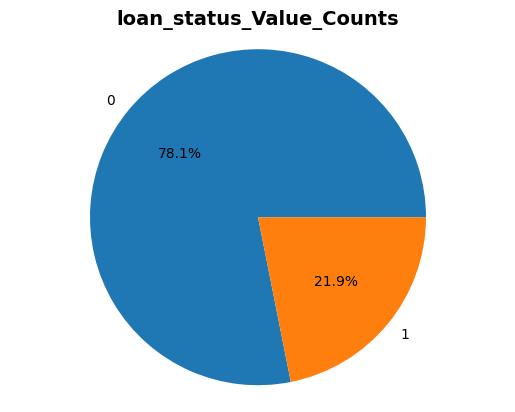

In [28]:
plot_pie_single('loan_status')

## Plotting Num Cols and Cat Cols

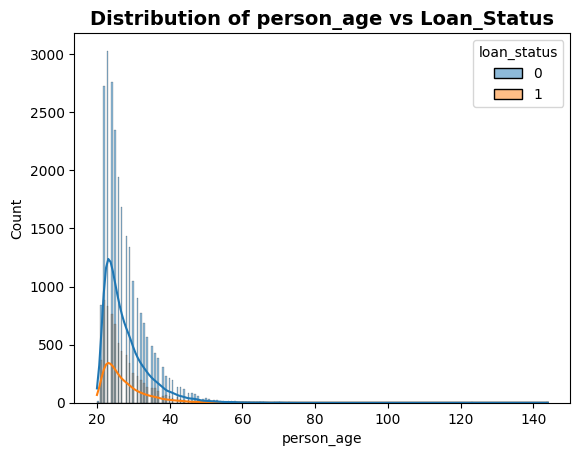

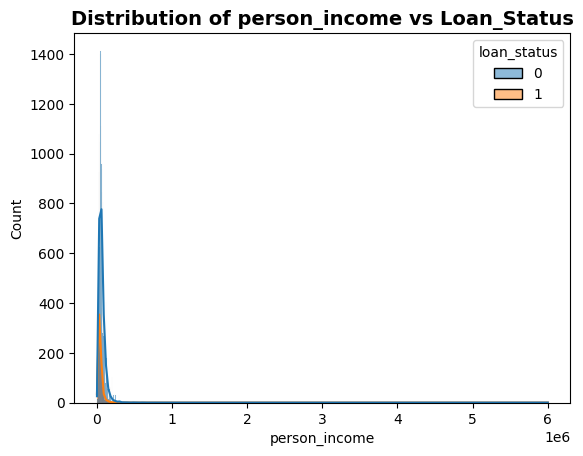

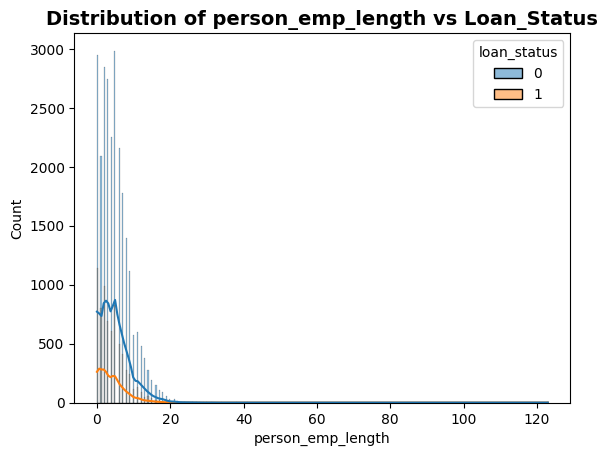

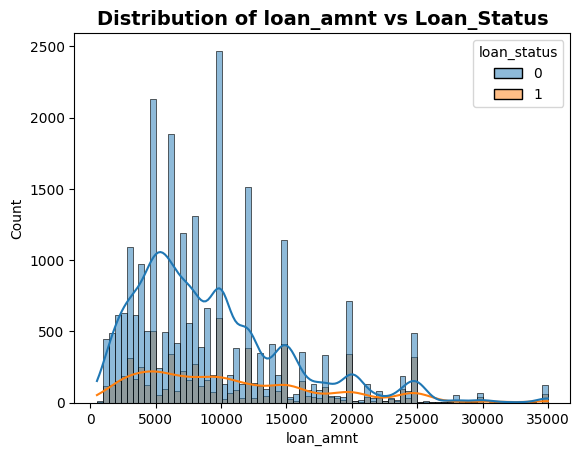

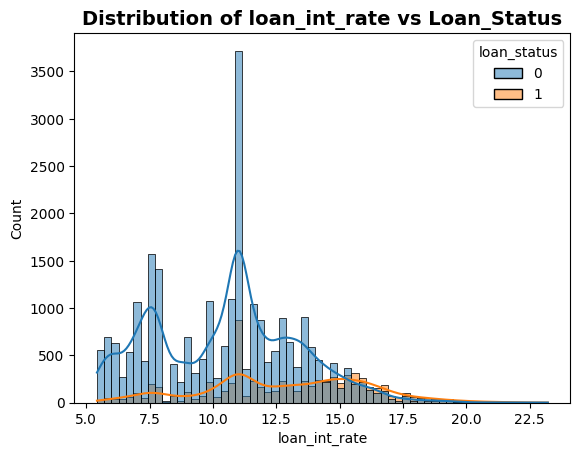

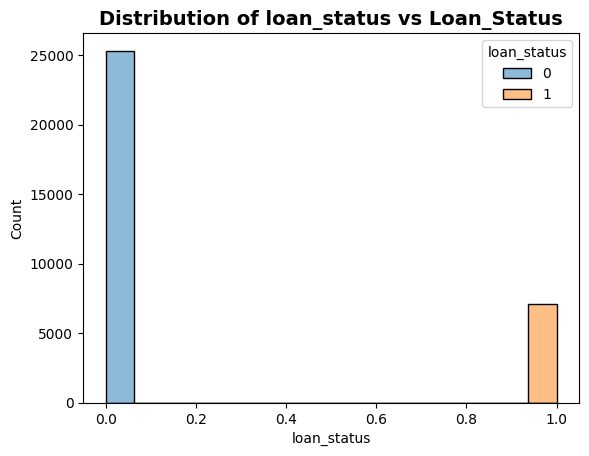

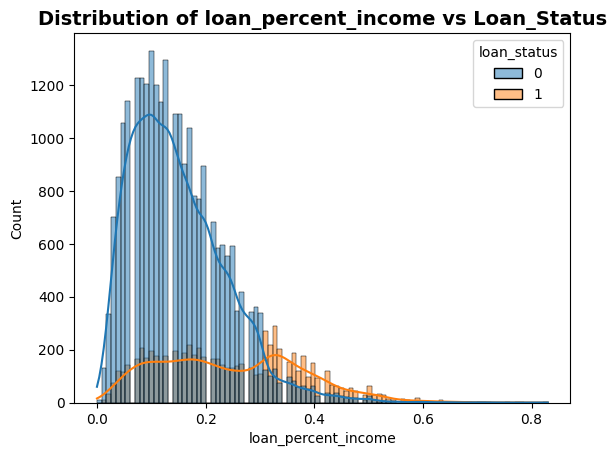

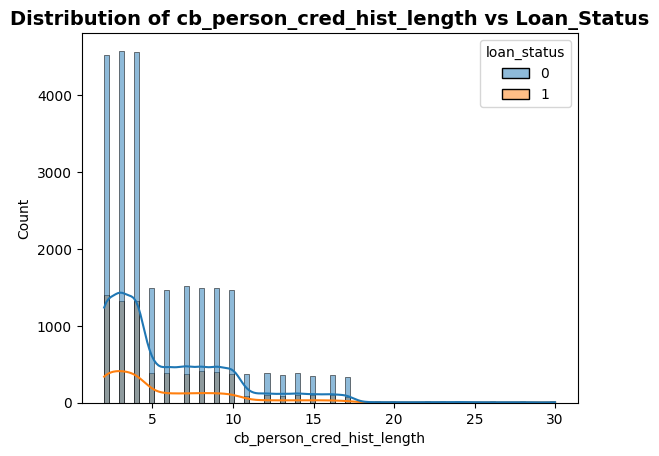

In [29]:
# plotting histograms for seeing the distributions of numerical variables

num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

# Plot histograms
for col in num_col:
    sns.histplot(data=df, x=col, hue='loan_status', kde=True)
    plt.title(f'Distribution of {col} vs Loan_Status', fontweight="bold", size=14)
    plt.show()
    print("\n")

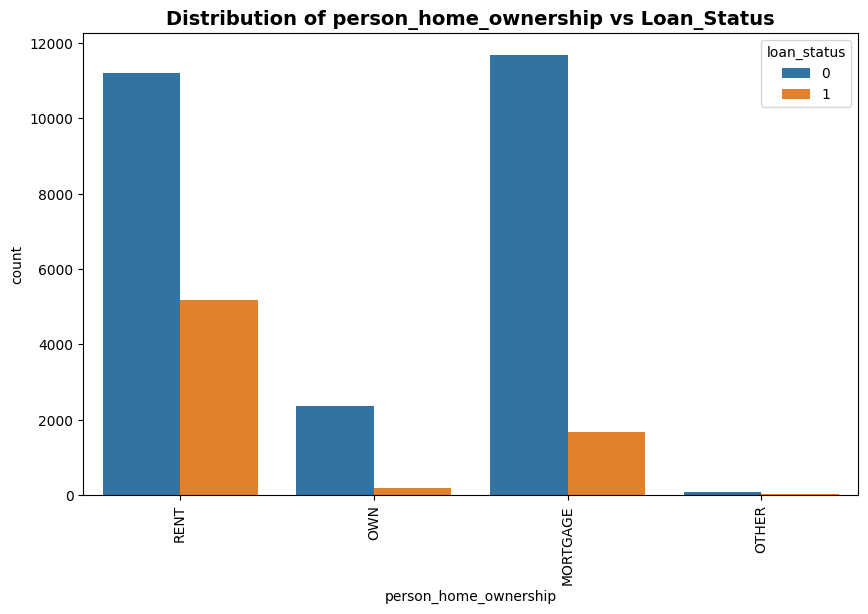

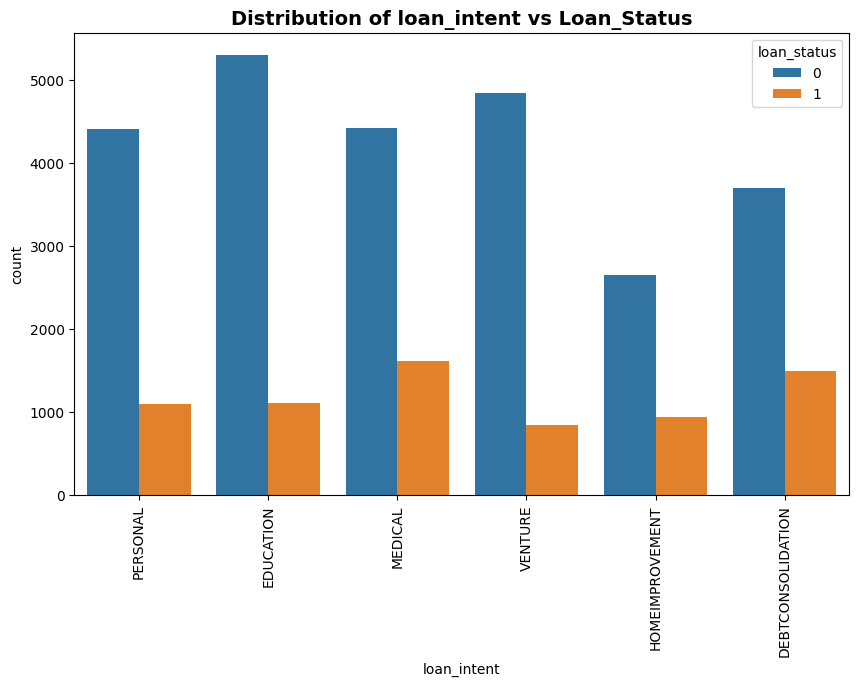

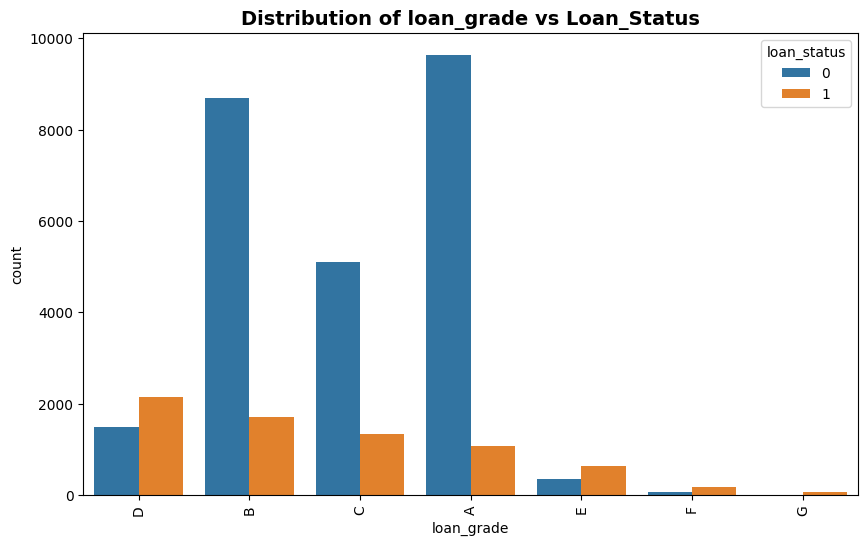

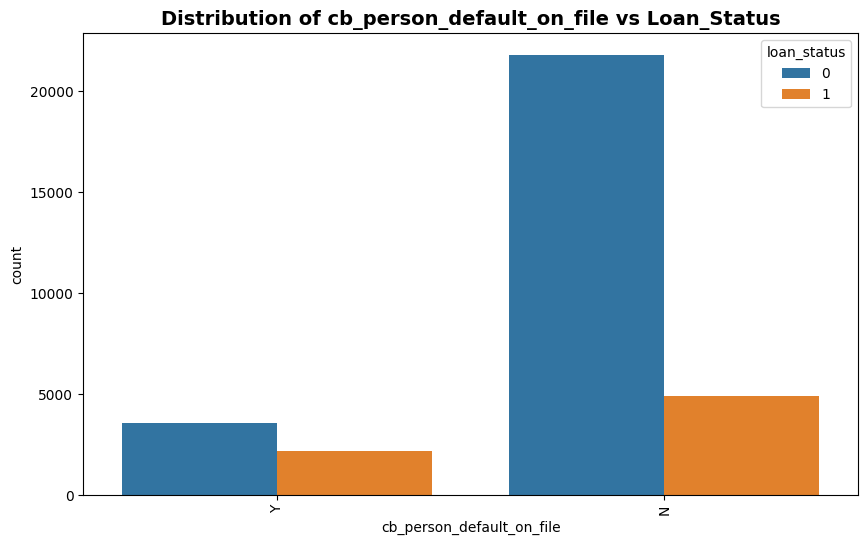

In [30]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(data=df,x=col,hue='loan_status' )
  plt.title(f'Distribution of {col} vs Loan_Status', fontweight="bold", size=14)
  plt.xticks(rotation=90)
  plt.show()
  print("\n")

# Plotting All Data Features

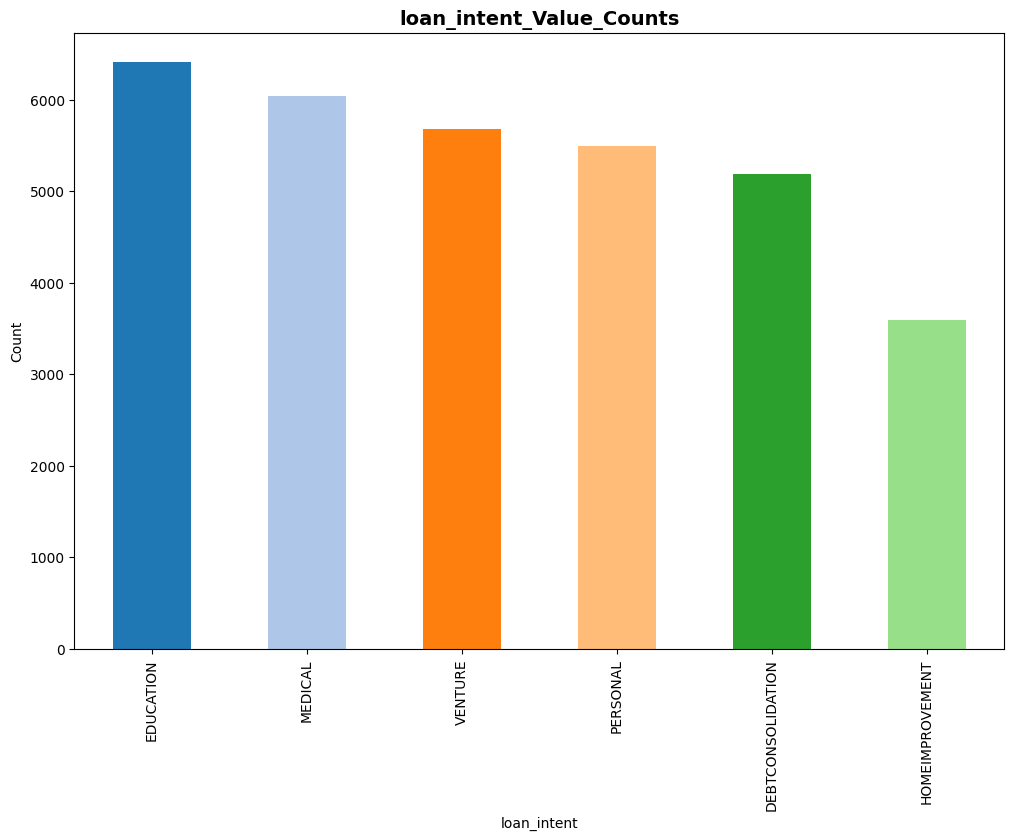

In [31]:
plot_bar_single('loan_intent')

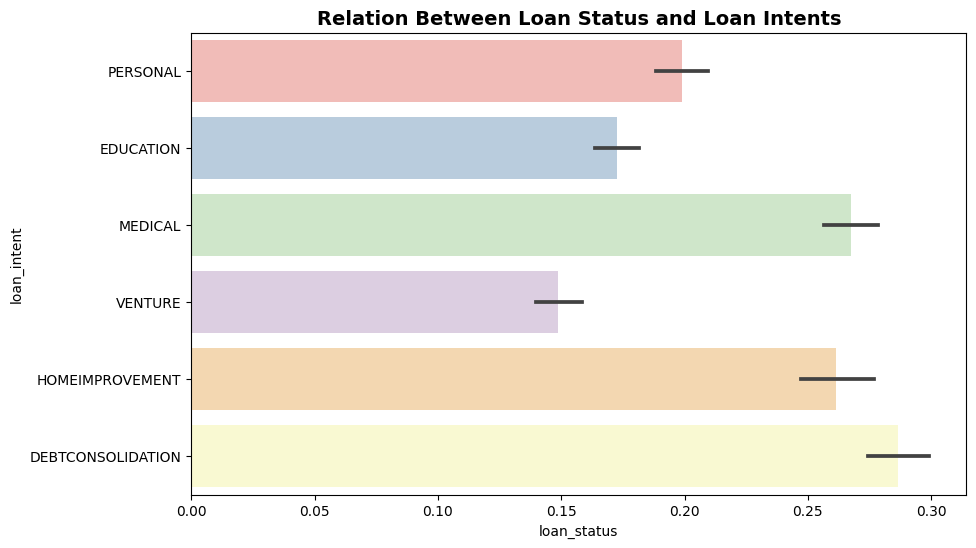

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["loan_status"], y=df["loan_intent"], palette='Pastel1')
plt.title("Relation Between Loan Status and Loan Intents", fontweight="bold", size=14)
plt.show()

<Figure size 1200x800 with 0 Axes>

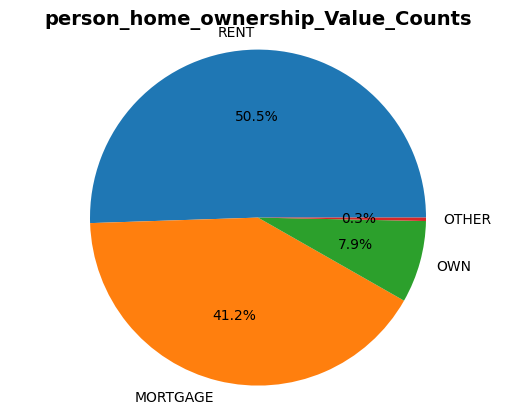

In [33]:
plot_pie_single('person_home_ownership')

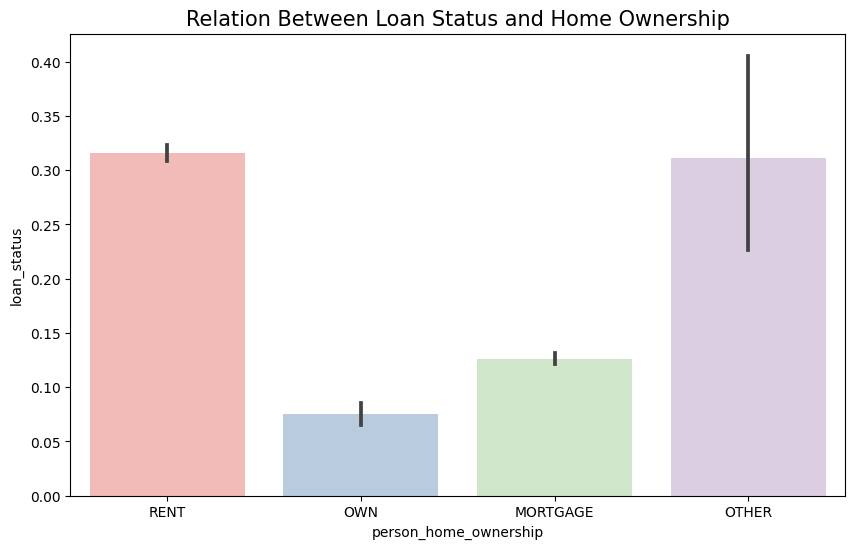

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["person_home_ownership"], y=df["loan_status"], palette='Pastel1')
plt.title("Relation Between Loan Status and Home Ownership", size=15)
plt.show()

In [35]:
max_age = df['person_age'].max()
min_age = df['person_age'].min()
print(f"maximum Age {max_age}")
print(f"minimum Age {min_age}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')

age_group([0 ,18, 26, 36, 46, 56, 66])

maximum Age 144
minimum Age 20
Age between 1 and 18: Number of people 0
Age between 19 and 26: Number of people 17707
Age between 27 and 36: Number of people 11796
Age between 37 and 46: Number of people 2356
Age between 47 and 56: Number of people 433
Age between 57 and 66: Number of people 98


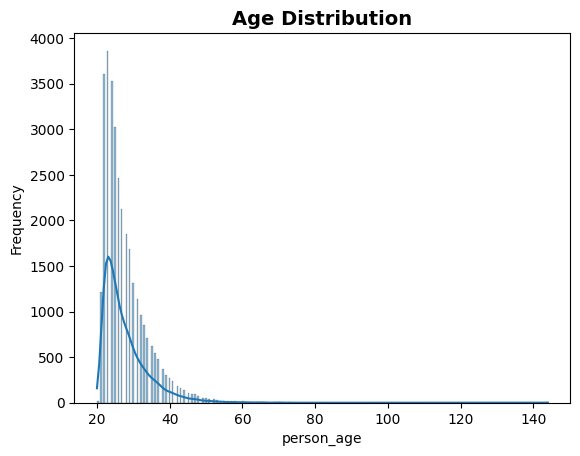

In [36]:
age_plot = pd.Series(df.person_age, name="person_age")
plt.ylabel('Frequency')
sns.histplot(age_plot, kde=True)  
plt.title('Age Distribution', fontweight="bold", size=14)
plt.show()

In [38]:
max_income = df['person_income'].max()
min_income = df['person_income'].min()

print(f"maximum Income {max_income}")
print(f"minimum Income {min_income}")

def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 2450
Income between 25001 and 50000: Number of people 11549
Income between 50001 and 75000: Number of people 9585
Income between 75001 and 100000: Number of people 4641
Income between 100001 and inf: Number of people 4191


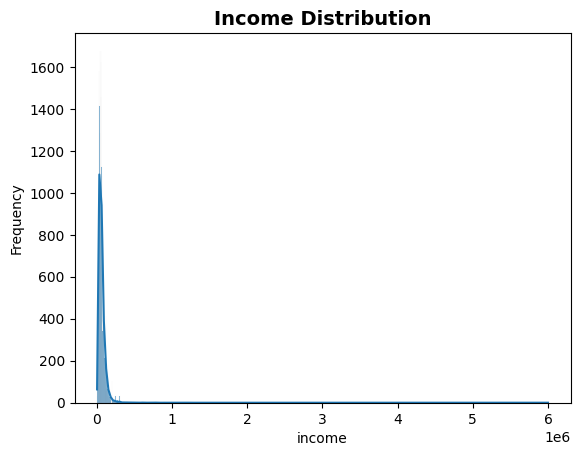

In [39]:
income_plot = pd.Series(df.person_income, name="income")
plt.ylabel('Frequency')
sns.histplot(income_plot, kde=True)  
plt.title('Income Distribution', fontweight="bold", size=14)
plt.show()

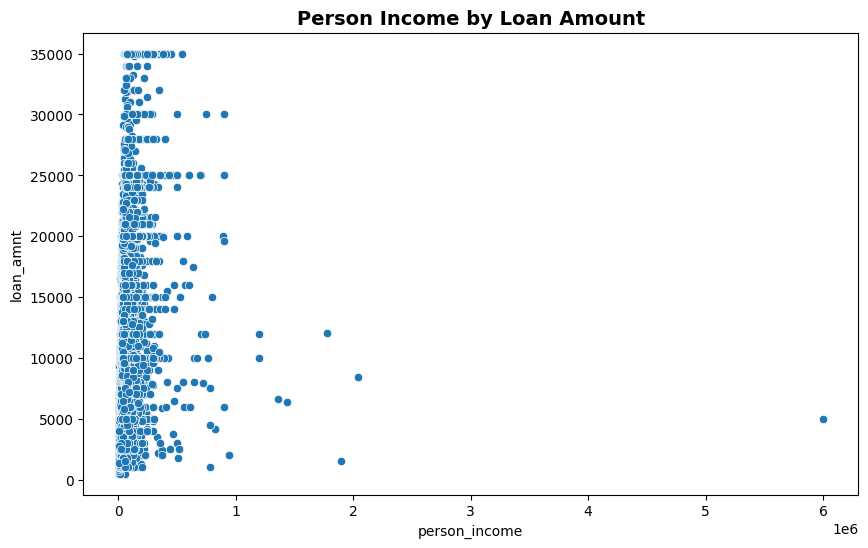

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="person_income", y="loan_amnt", data=df)
plt.title("Person Income by Loan Amount", fontweight="bold", size=14)
plt.show()

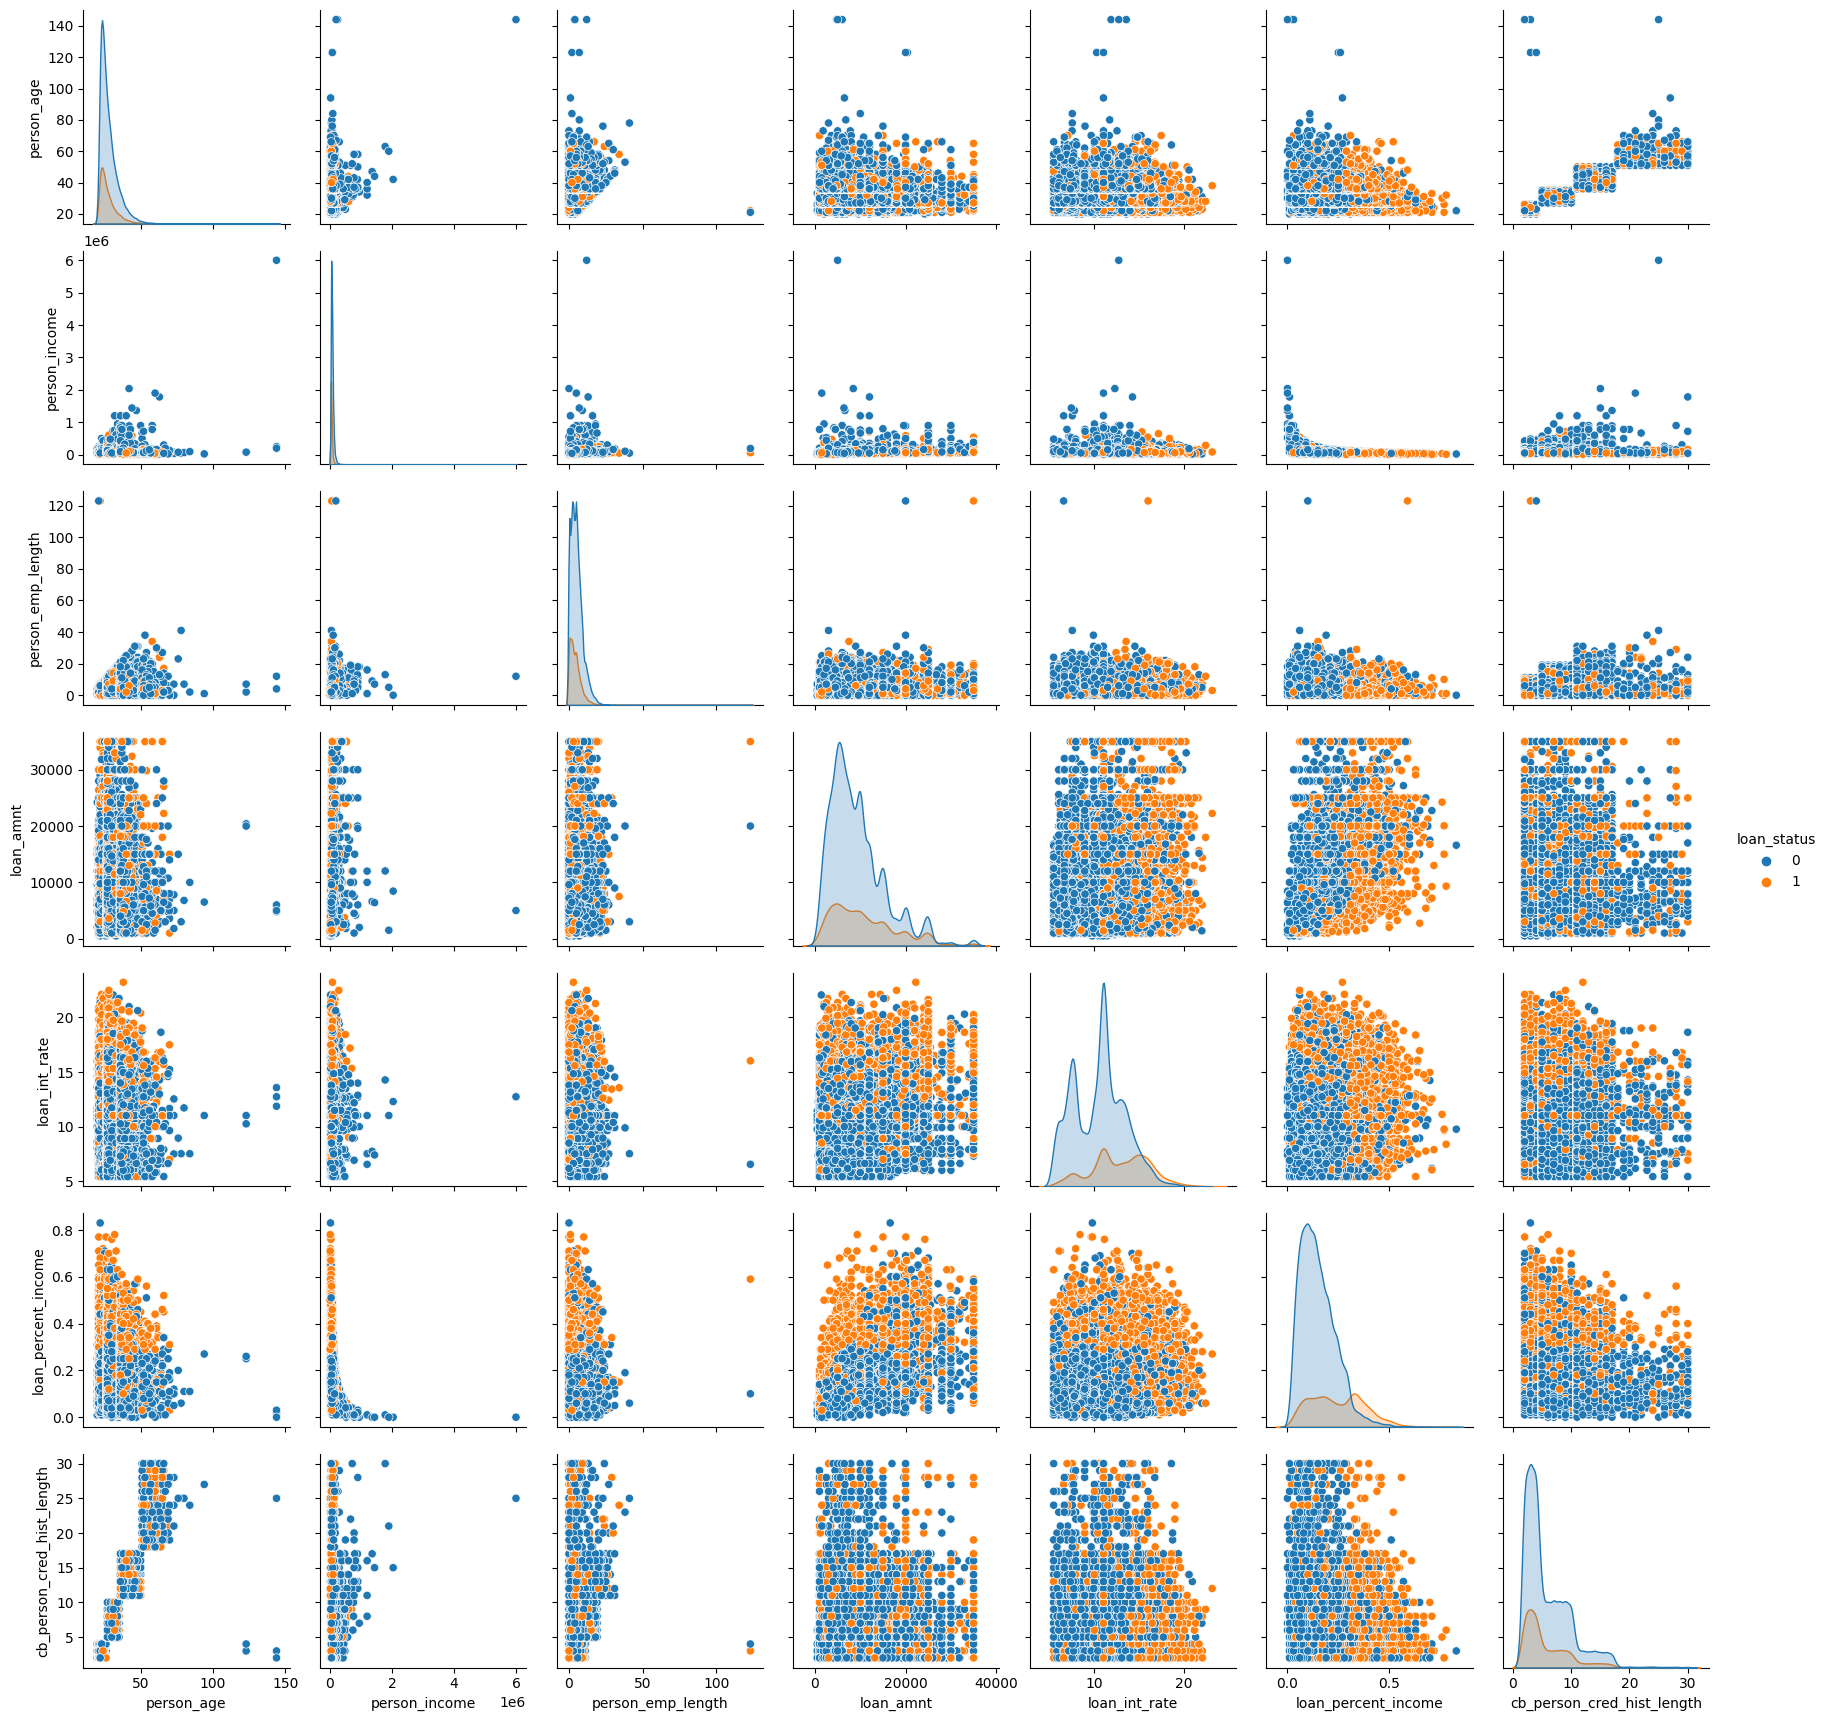

In [39]:
sns.pairplot(df,hue="loan_status")